In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [46]:
flight = pd.read_csv("Flight_Cleaned_Nov24.csv")
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707103 entries, 0 to 707102
Data columns (total 27 columns):
QUARTER              707103 non-null int64
MONTH                707103 non-null int64
DAY_OF_MONTH         707103 non-null int64
DAY_OF_WEEK          707103 non-null int64
FL_DATE              707103 non-null object
OP_UNIQUE_CARRIER    707103 non-null object
TAIL_NUM             707103 non-null object
OP_CARRIER_FL_NUM    707103 non-null int64
ORIGIN               707103 non-null object
ORIGIN_CITY_NAME     707103 non-null object
ORIGIN_STATE_ABR     707103 non-null object
DEST                 707103 non-null object
DEST_CITY_NAME       707103 non-null object
DEST_STATE_ABR       707103 non-null object
DEP_TIME             707103 non-null int64
DEP_DELAY_NEW        707103 non-null int64
DEP_TIME_BLK         707103 non-null object
TAXI_OUT             707103 non-null int64
TAXI_IN              707103 non-null int64
ARR_TIME             707103 non-null int64
ARR_DELAY_NEW      

In [47]:
flight.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,ORIGIN_CITY_NAME,...,TAXI_OUT,TAXI_IN,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,AIR_TIME,DISTANCE,DISTANCE_GROUP,TOTAL_DELAY,DELAY
0,1,1,28,7,1/28/2018,WN,N7744A,2610,ATL,"Atlanta, GA",...,22,4,2331,1,2300-2359,109,696,3,0,True
1,1,1,29,1,1/29/2018,OO,N426SW,4692,DTW,"Detroit, MI",...,52,5,903,2,0900-0959,56,374,2,0,True
2,1,1,22,1,1/22/2018,DL,N344NB,2470,ATL,"Atlanta, GA",...,25,6,2118,0,2100-2159,81,591,3,0,True
3,1,1,19,5,1/19/2018,UA,N493UA,1234,TPA,"Tampa, FL",...,13,5,2010,0,2000-2059,129,787,4,0,True
4,1,1,15,1,1/15/2018,OO,N863AS,3358,SEA,"Seattle, WA",...,22,4,716,0,0700-0759,30,129,1,0,True


In [29]:
def stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
# Creation of a dataframe with statitical infos on each airline:
stats = flight['TOTAL_DELAY'].groupby(flight['OP_UNIQUE_CARRIER']).apply(stats).unstack()
stats = stats.sort_values('count')
stats

,min,max,count,mean
OP_UNIQUE_CARRIER,,,,
VX,0.0,403.0,1703.0,10.114504
HA,0.0,981.0,8353.0,4.376631
G4,0.0,1380.0,9602.0,16.408977
F9,0.0,896.0,11743.0,20.956314
NK,0.0,1400.0,17292.0,12.733808
EV,0.0,1553.0,19456.0,16.666478
YV,0.0,1478.0,20867.0,15.065462
9E,0.0,1226.0,22967.0,15.402055
AS,0.0,621.0,24244.0,8.083650


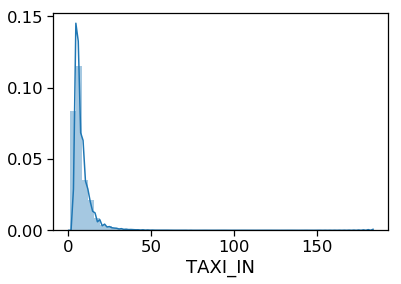

In [30]:
sns.distplot(flight['TAXI_IN'])
plt.show()

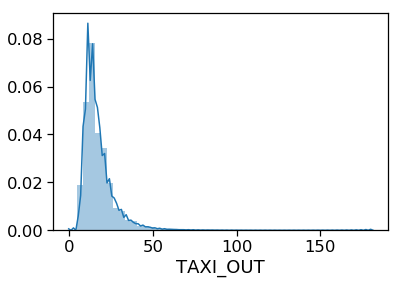

In [31]:
sns.distplot(flight['TAXI_OUT'])
plt.show()

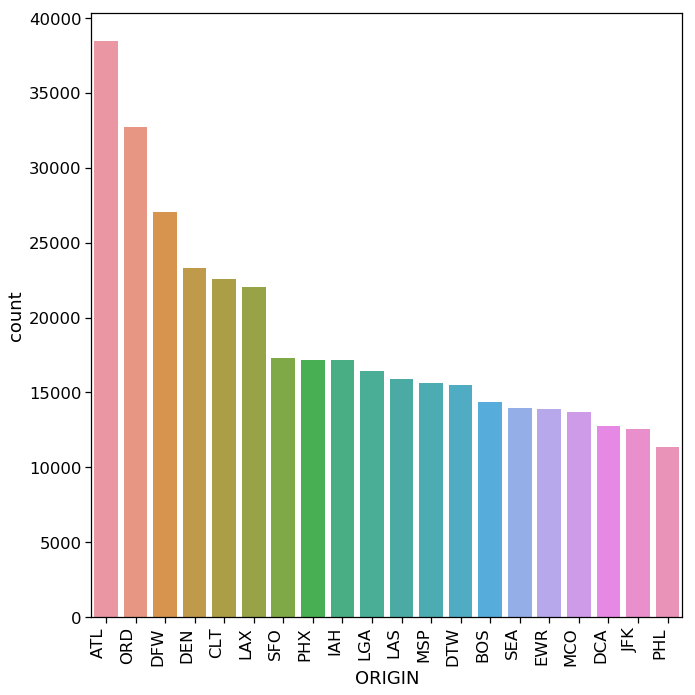

In [32]:
# origin city count 
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flight['ORIGIN'], data = flight,
              order=flight['ORIGIN'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

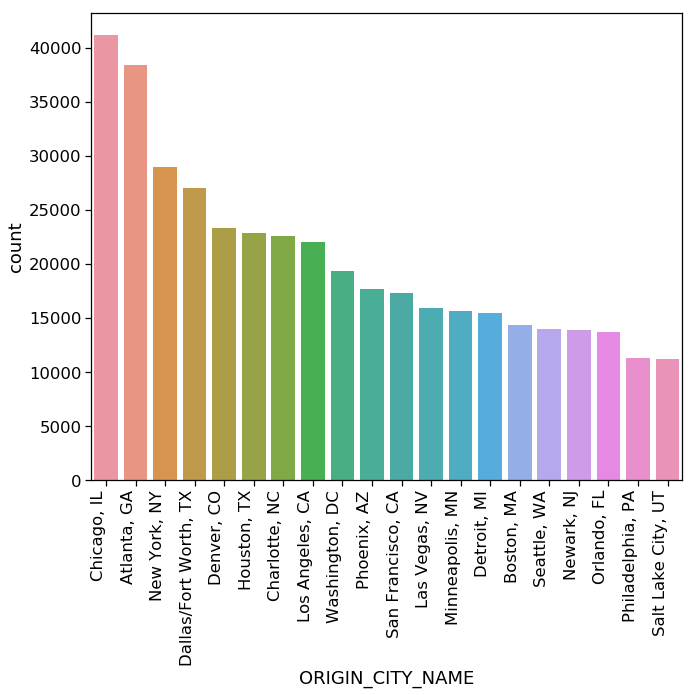

In [33]:
#origin airport
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=flight['ORIGIN_CITY_NAME'], data = flight,
              order=flight['ORIGIN_CITY_NAME'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

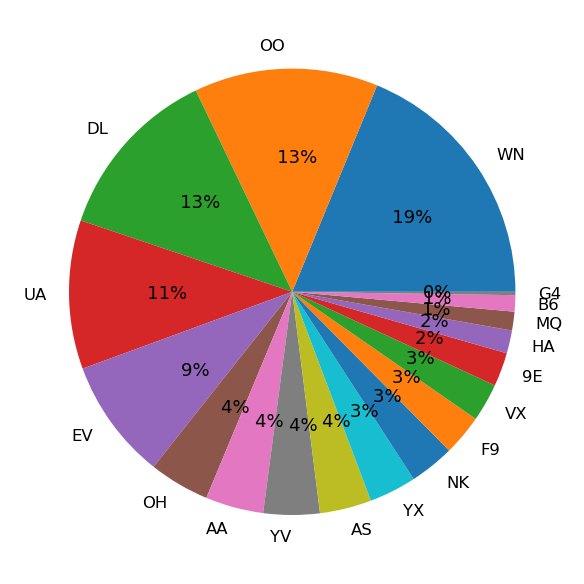

In [34]:
axis = plt.subplots(figsize=(10,14))
Name = flight["OP_UNIQUE_CARRIER"].unique()
size = flight["OP_UNIQUE_CARRIER"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

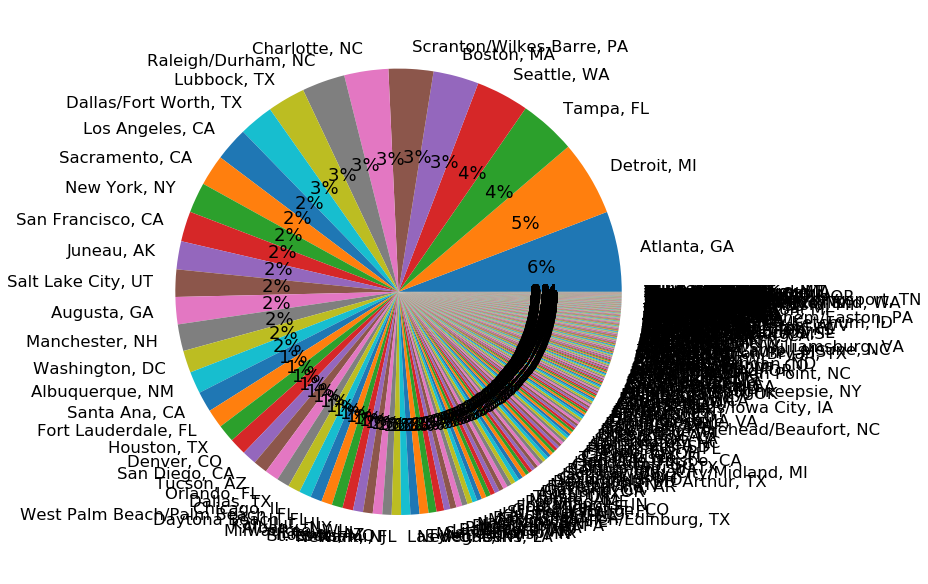

In [35]:
# origin city name count - ignore 
axis = plt.subplots(figsize=(10,14))
Name = flight["ORIGIN_CITY_NAME"].unique()
size = flight["ORIGIN_CITY_NAME"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

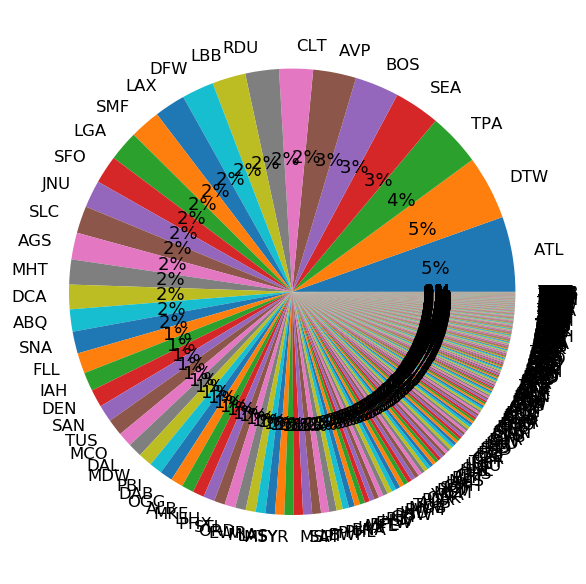

In [36]:
# origin airport count - ignore
axis = plt.subplots(figsize=(10,14))
Name = flight["ORIGIN"].unique()
size = flight["ORIGIN"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

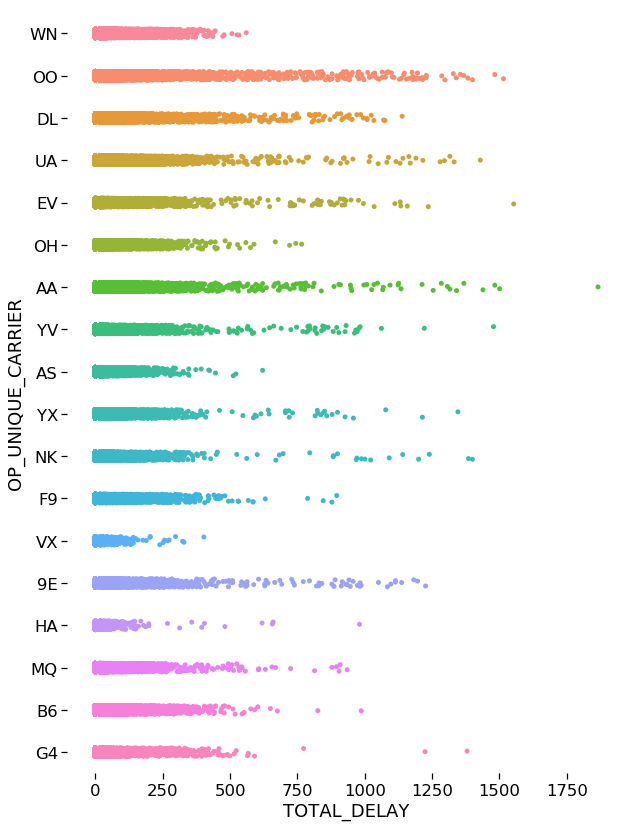

In [37]:
# airline carrier - total delay
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="TOTAL_DELAY", y="OP_UNIQUE_CARRIER",
              data = flight, dodge=True, jitter=True)
plt.show()

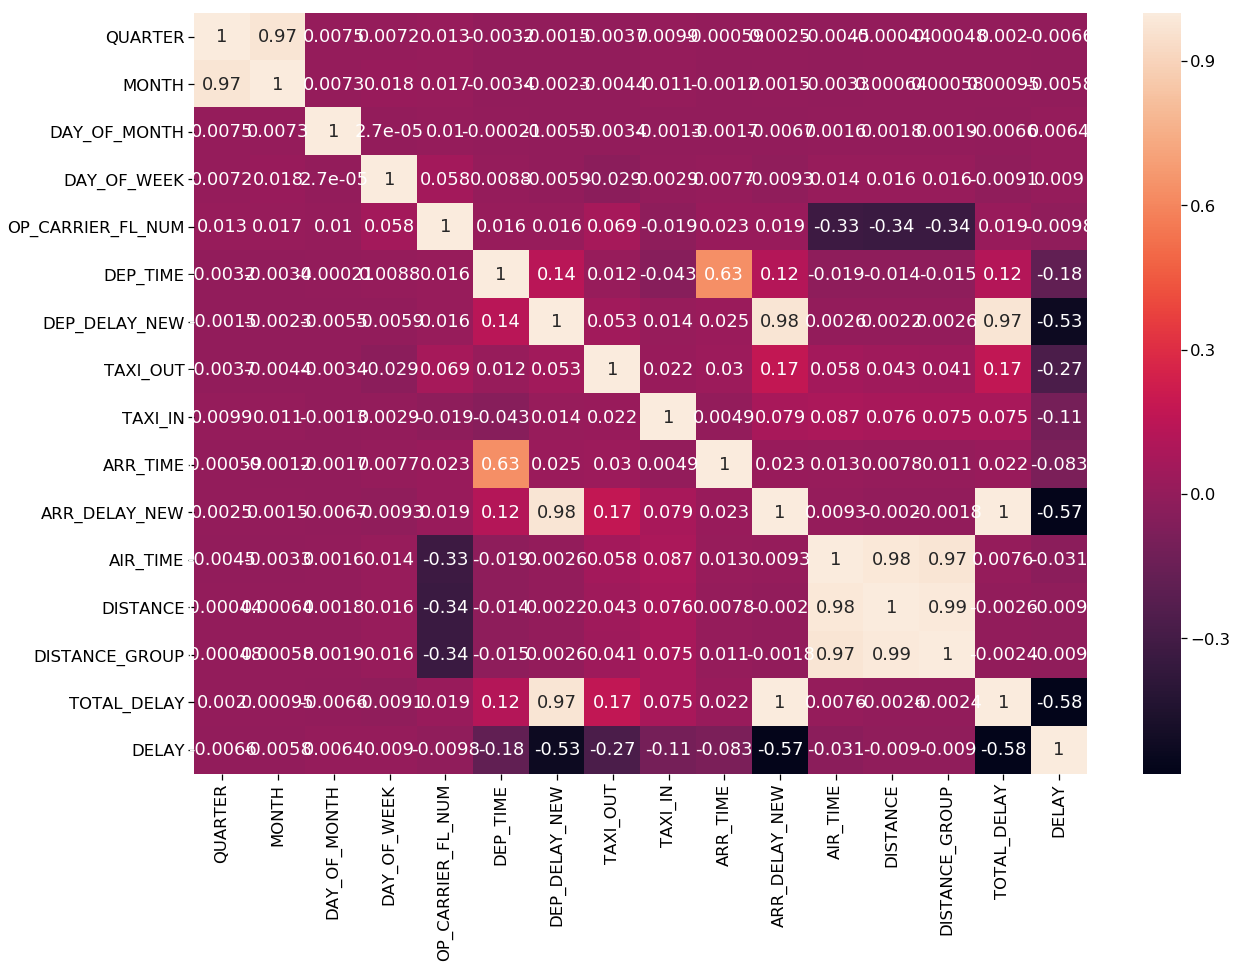

In [38]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flight.corr(),annot = True)
plt.show()

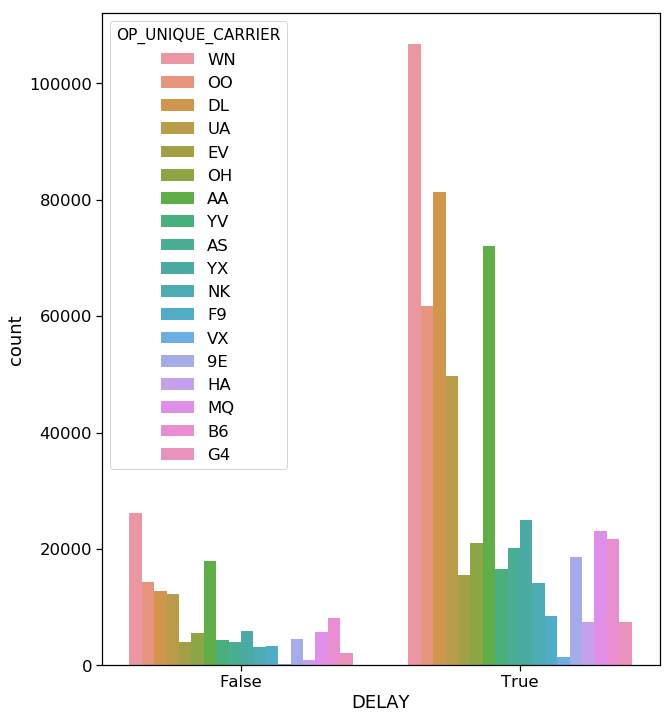

In [48]:
figsize=plt.subplots(figsize=(10,12))
sns.countplot(x='DELAY',hue='OP_UNIQUE_CARRIER',data=flight)
plt.show()

[Text(0.5, 0, 'TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)')]

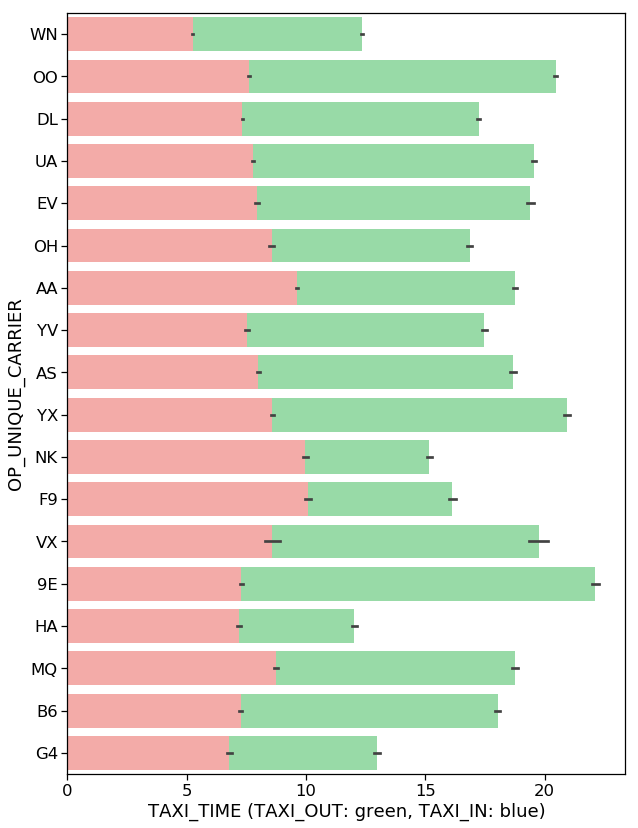

In [40]:
# Plot to show the Taxi In and Taxi Out Time
axis = plt.subplots(figsize=(10,14))
sns.set_color_codes("pastel")
sns.set_context("notebook", font_scale=1.5)
axis = sns.barplot(x="TAXI_OUT", y="OP_UNIQUE_CARRIER", data=flight, color="g")
axis = sns.barplot(x="TAXI_IN", y="OP_UNIQUE_CARRIER", data=flight, color="b")
axis.set(xlabel="TAXI_TIME (TAXI_OUT: green, TAXI_IN: blue)")